# Préprocessing simple et prémier modèle

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("data/dataset.xlsx")

In [3]:
df = data.copy()
num_cols = df.select_dtypes(exclude='object').columns
objet_cols = df.select_dtypes(exclude=np.number).columns

In [4]:
# Je convertis en liste pour pouvoir faire un append des variables GAJ et COEUR
objet_cols = objet_cols.to_list()
objet_cols.append('GAJ')
objet_cols.append('CŒUR')
num_cols = num_cols.drop(['GAJ', 'CŒUR'])

In [5]:
df[objet_cols]

,SEXE,TDT,ECG,ANGINE,PENTE,GAJ,CŒUR
0,homme,AA,Normal,Non,Ascendant,0,0
1,femme,DNA,Normal,Non,Plat,0,1
2,homme,AA,ST,Non,Ascendant,0,0
3,femme,ASY,Normal,Oui,Plat,0,1
4,homme,DNA,Normal,Non,Ascendant,0,0
...,...,...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat,0,1
914,homme,ASY,Normal,Non,Plat,1,1
915,homme,ASY,Normal,Oui,Plat,0,1
916,femme,AA,LVH,Non,Plat,0,1


In [6]:
df[num_cols]

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [7]:
for col in objet_cols:
    mod = df[col].unique()
    print(f"{col}\n{mod}\n\n")

SEXE
['homme' 'femme']


TDT
['AA' 'DNA' 'ASY' 'AT']


ECG
['Normal' 'ST' 'LVH']


ANGINE
['Non' 'Oui']


PENTE
['Ascendant' 'Plat' 'Descendant']


GAJ
[0 1]


CŒUR
[0 1]




In [8]:
#fonction d'encodage des variables qualitatives
def encode_object(dataframe):
    df['ECG'].replace({'Normal': 0, 'ST': 1,'LVH':2}, inplace=True)
    df['SEXE'].replace({'femme': 0, 'homme': 1}, inplace=True)
    df['ANGINE'].replace({'Oui': 1, 'Non': 0}, inplace=True)
    df['TDT'].replace({'AT': 0, 'AA': 1,'DNA':2,'ASY':3}, inplace=True)
    df['PENTE'].replace({'Ascendant': 0,'Plat': 1, 'Descendant': 2}, inplace=True)
    return df

In [9]:
df = encode_object(df)
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,1,1
914,68,1,3,144,193,1,0,141,0,3.4,1,1
915,57,1,3,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 

In [11]:
numeric_transformer = StandardScaler()
df[num_cols] = numeric_transformer.fit_transform(df[num_cols])
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,-1.433140,1,1,0.410909,0.825070,0,0,1.382928,0,-0.832432,0,0
1,-0.478484,0,2,1.491752,-0.171961,0,0,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,1,-1.525138,0,-0.832432,0,0
3,-0.584556,0,3,0.302825,0.139040,0,0,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,0,-0.581981,0,-0.832432,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,0,-1.210356,0.596393,0,0,-0.188999,0,0.293283,1,1
914,1.536902,1,3,0.627078,-0.053049,1,0,0.164684,0,2.357094,1,1
915,0.370100,1,3,-0.129513,-0.620168,0,0,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,0,2,1.461525,0,-0.832432,1,1


In [12]:
x = df.drop('CŒUR', axis=1)
y = df['CŒUR']

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [15]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [16]:
# on peut afficher les coefficients du modèle :
logistic.coef_

array([[ 0.06249499,  1.07487103,  0.65774456,  0.09584136, -0.41865949,
         0.80185526,  0.08484822, -0.24407061,  0.99250177,  0.36439144,
         1.55935971]])

### Odds Ratios

In [42]:
odds_ratio = np.exp(logistic.coef_)
x_col = pd.DataFrame(odds_ratio, columns=df.columns[:-1])
x_col

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,1.064489,2.929615,1.930433,1.100584,0.657928,2.229674,1.088552,0.783432,2.697976,1.439638,4.755775


In [35]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=logistic, 
                 cv=10, 
                 scoring='neg_mean_squared_error')
selector.fit(x_train, y_train)
print("Nombre optimal de caractéristiques: %d" 
      % selector.n_features_)

Nombre optimal de caractéristiques: 7


In [43]:
print("Variables les plus importantes pour la régression logistique")
x_col.columns[selector.support_]

Variables les plus importantes pour la régression logistique


Index(['SEXE', 'TDT', 'CHOLESTEROL', 'GAJ', 'ANGINE', 'DEPRESSION', 'PENTE'], dtype='object')

In [17]:
# on prédit grâce à ce modèle
y_predict = logistic.predict(x_test)

In [23]:
print("Rapport pour le modèle Logistique :",
      classification_report(y_test, y_predict, target_names=['Abscence', 'Présence']) ,sep="\n")
matrix = confusion_matrix(y_test, y_predict)
pd.DataFrame(matrix)

Rapport pour le modèle Logistique :
              precision    recall  f1-score   support

    Abscence       0.87      0.89      0.88        94
    Présence       0.89      0.86      0.87        90

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



,0,1
0,84,10
1,13,77


Ici nous allons utiliser la précision comme métrique.

La précision étant la probabilité que le modèle prédise un malade quand celui-ci est malade.

Vu que les classe ne sont pas désiquilibrées on aurait pu utilisé accuracy comme métriques

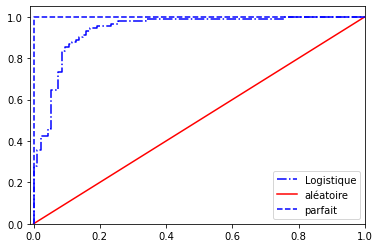

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve

# on extrait les probabilités d'appartenance
proba_ped = logistic.predict_proba(x_test)[:,1]

# cas du modèle RF
fpr, tpr, _ = roc_curve(y_test, proba_ped)
plt.plot(fpr,tpr,"b-.", label="Logistique")

# modèle aléatoire
plt.plot([0, 1], [0, 1],"r-", label="aléatoire", )

# modèle parfait
plt.plot([0,0, 1], [0,1, 1], 'b--', label="parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [26]:
from sklearn.metrics import roc_auc_score
auc_modele = roc_auc_score(y_test, logistic.predict_proba(x_test)[:,1])

print("Aire sous la courbe ROC pour le modèle logistique :" , auc_modele)

Aire sous la courbe ROC pour le modèle logistique : 0.9367612293144209


La courbe nous nous montre la qualité de notre modèle qui se rapproche du modèle parfait